In [4]:
import requests
import json
import pandas as pd
import geopandas as gpd
import numpy as np
from sqlalchemy import create_engine
import psycopg2
from datetime import datetime
import seaborn as sns
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point


In [5]:
def run_sql(sql_file_path):
    with open(sql_file_path, 'r') as sql_file:
        sql_content = sql_file.read()
# print(sql_content)

    result = pd.read_sql_query(sql_content , con=engine)
    return result

In [7]:
# PostgreSQL连接参数
db_params = {
    'host': 'localhost',
    'port': '5432',
    'user': 'postgres',
    'password': '12200301',
    'database': 'db_4501',
}

# 创建一个SQLAlchemy引擎
engine = create_engine(f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}")

In [8]:
sql_file_path = 'query7.sql'
result = run_sql(sql_file_path)
result

,month,zipcode,complaint_num,crash_num
0,2015-01,10001,2,159
1,2015-01,10002,21,113
2,2015-01,10003,1,95
3,2015-01,10004,8,26
4,2015-01,10005,4,8
...,...,...,...,...
17569,2023-09,11436,1,22
17570,2023-09,11691,14,40
17571,2023-09,11692,1,11
17572,2023-09,11693,10,9


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from matplotlib.cm import ScalarMappable

<IPython.core.display.Javascript object>


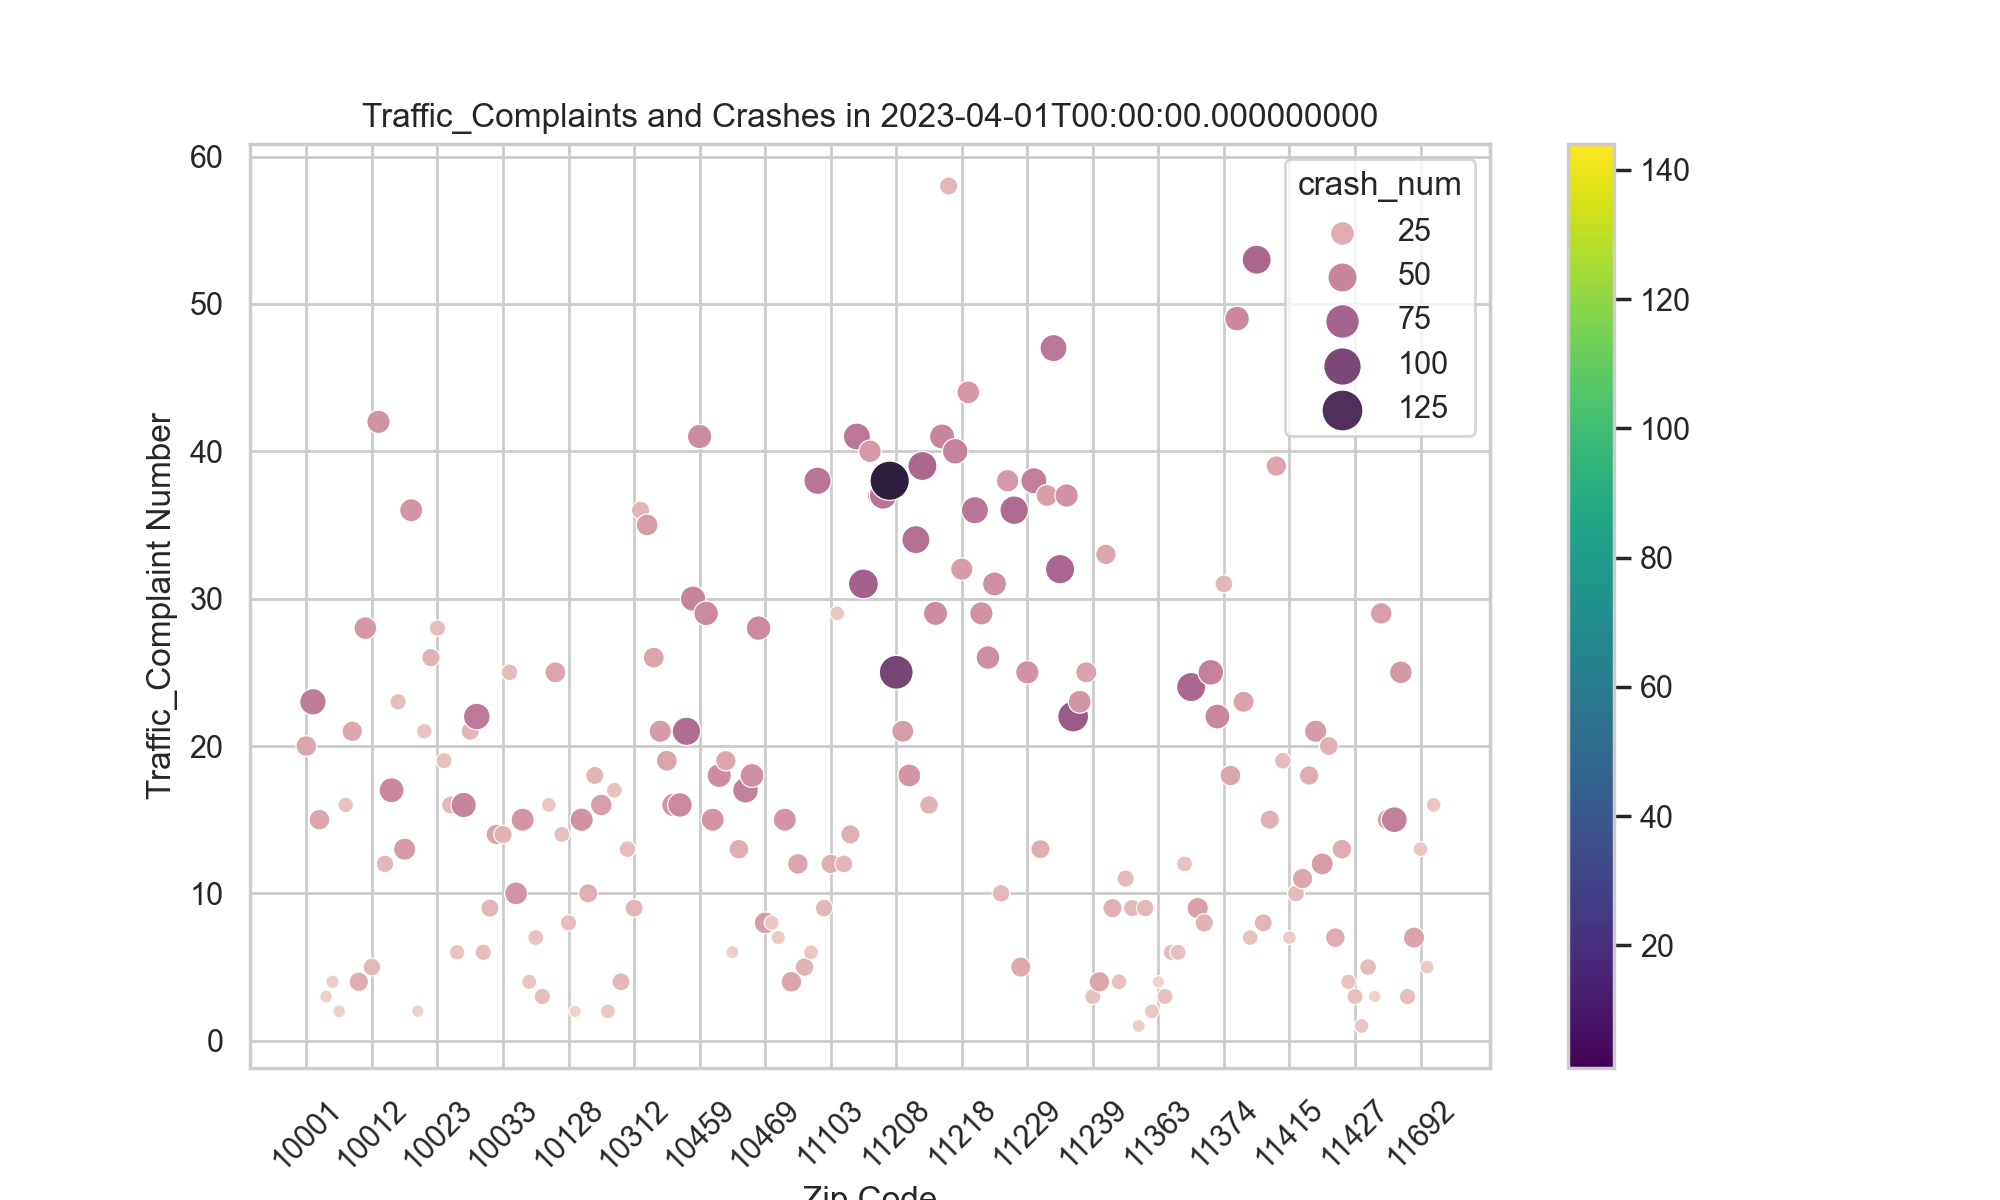

In [29]:
result['month'] = pd.to_datetime(result['month'])

# 设置 seaborn 风格
sns.set(style="whitegrid")

# 初始化图表
fig, ax = plt.subplots(figsize=(10, 6))


# 绘制初始状态
scatter = sns.scatterplot(data=result, x='zipcode', y='complaint_num', hue='crash_num', size='crash_num', sizes=(20, 200), ax=ax)

# 设置标题
ax.set_title('Traffic_Complaints and Crashes Over Time')

# 设置 x 轴标签
ax.set_xlabel('Zip Code')

# 设置 y 轴标签
ax.set_ylabel('traffic_complaint_num')

# 创建 ScalarMappable 对象并设置颜色映射
sm = ScalarMappable(cmap='viridis')
sm.set_array([])  # 空数组，稍后设置颜色映射范围

# 添加颜色条
cbar = plt.colorbar(sm, ax=ax)

# 定义更新函数
def update(frame):
    # 清除当前图表
    ax.clear()

    # 筛选出当前帧的数据
    current_data = result[result['month'] == frame]

    # 绘制当前帧的散点图
    scatter = sns.scatterplot(data=current_data, x='zipcode', y='complaint_num', hue='crash_num', size='crash_num', sizes=(20, 200), ax=ax)

    # 设置标题
    ax.set_title(f'Traffic_Complaints and Crashes in {frame}')

    
    ax.set_xticks(range(0, len(current_data['zipcode']), 10))
    ax.set_xticklabels(current_data['zipcode'][::10], rotation=45)
    
    # 设置 x 轴标签
    ax.set_xlabel('Zip Code')


    # 设置 y 轴标签
    ax.set_ylabel('Traffic_Complaint Number')

    # 更新 ScalarMappable 对象的颜色映射范围
    sm.set_clim(vmin=current_data['crash_num'].min(), vmax=current_data['crash_num'].max())

    # 更新颜色条
    cbar.update_normal(sm)

# 创建动图
ani = FuncAnimation(fig, update, frames=result['month'].unique(), blit=False)

# 显示动图
plt.show()




In [12]:
%matplotlib notebook

In [32]:
ani.save('visual7.gif', writer='Pillow', fps=24)

MovieWriter Pillow unavailable; using Pillow instead.
